In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [3]:
data=pd.read_csv(r'C:\Users\91926\Downloads\Social_Network_Ads.csv')

In [4]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [21]:
X=data.iloc[:,0:2].values

In [22]:
y=data.iloc[:,-1].values

In [16]:
def analyzer(max_depth):
    data=pd.read_csv(r'C:\Users\91926\Downloads\Social_Network_Ads.csv')
    X=data.iloc[:,0:2].values
    y=data.iloc[:,-1]
    clf=DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X,y)
    a=np.arange(start=X[:,0].min()-1,stop=X[:,0].max()+1,step=0.1)
    b=np.arange(start=X[:,1].min()-1,stop=X[:,1].max()+1,step=100)
    XX,YY=np.meshgrid(a,b)
    input_array=np.array([XX.ravel(),YY.ravel()]).T
    labels=clf.predict(input_array)
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1],c=y)

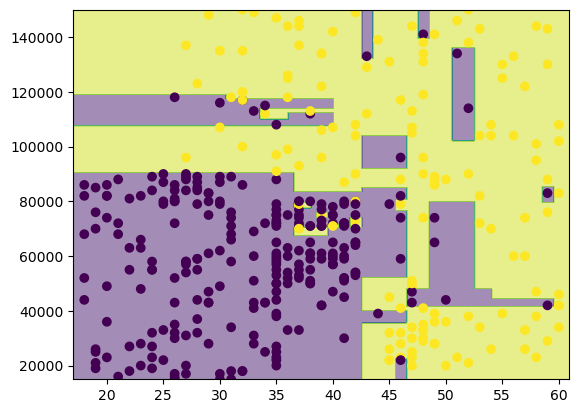

In [17]:
analyzer(max_depth=None)

### The above graph is a clear case of Overfitting

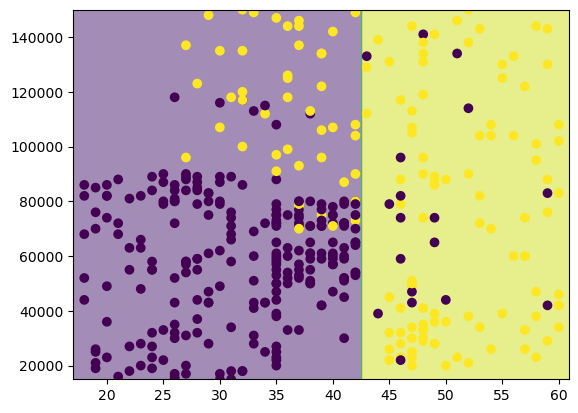

In [19]:
analyzer(max_depth=1)

### The above graph is a clear case of Underfitting

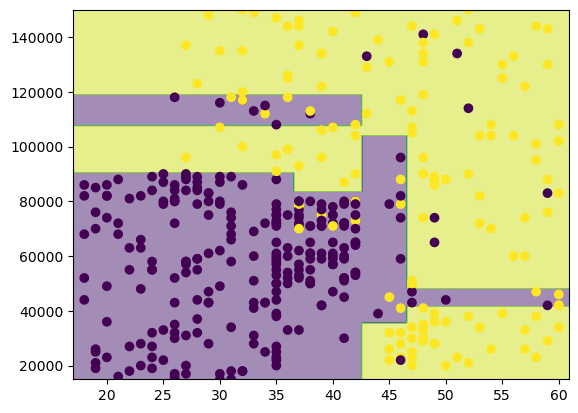

In [20]:
analyzer(max_depth=4)

### The above graph seems to be optimum value of max_depth hyperparameter

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Decision Tree Cassifier

In [25]:
dtree=DecisionTreeClassifier()

In [26]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred=dtree.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,r2_score,confusion_matrix

In [36]:
print(classification_report(y_test,y_pred))
print('\n')
print(r2_score(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        89
           1       0.72      0.84      0.77        43

    accuracy                           0.84       132
   macro avg       0.82      0.84      0.83       132
weighted avg       0.85      0.84      0.84       132



0.2756728507969691


[[75 14]
 [ 7 36]]


## Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rforest=RandomForestClassifier(n_estimators=200)

In [33]:
rforest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [34]:
rf_pred=rforest.predict(X_test)

In [35]:
print(classification_report(y_test,rf_pred))
print('\n')
print(r2_score(y_test,rf_pred))
print('\n')
print(confusion_matrix(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        89
           1       0.75      0.93      0.83        43

    accuracy                           0.88       132
   macro avg       0.86      0.89      0.87       132
weighted avg       0.89      0.88      0.88       132



0.44813169584530976


[[76 13]
 [ 3 40]]


## As we can see above performance metrics, it gives slightly better result in case of Random Forest as compare to Decision Tree

# THANKS